In [1]:
import os
import re
import requests
from PIL import Image
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data_dir = r"D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB_Chest_Radiography_Database\New_folder\split\train"
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
# print(folds)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

train_df = pd.concat([Fseries, Lseries], axis= 1)
train_df

,filepaths,labels
0,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Normal
1,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Normal
2,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Normal
3,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Normal
4,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Normal
...,...,...
3355,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Tuberculosis
3356,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Tuberculosis
3357,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Tuberculosis
3358,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Tuberculosis


In [3]:
val_data_dir = r"D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB_Chest_Radiography_Database\New_folder\split\val"
filepaths = []
labels = []
folds = os.listdir(val_data_dir)
for fold in folds:
    foldpath = os.path.join(val_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
valid_df = pd.concat([Fseries, Lseries], axis= 1)
valid_df

,filepaths,labels
0,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Normal
1,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Normal
2,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Normal
3,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Normal
4,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Normal
...,...,...
415,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Tuberculosis
416,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Tuberculosis
417,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Tuberculosis
418,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Tuberculosis


In [4]:
test_data_dir =r"D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB_Chest_Radiography_Database\New_folder\split\test"
filepaths = []
labels = []

folds = os.listdir(test_data_dir)
for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis= 1)
test_df

,filepaths,labels
0,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Normal
1,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Normal
2,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Normal
3,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Normal
4,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Normal
...,...,...
415,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Tuberculosis
416,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Tuberculosis
417,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Tuberculosis
418,D:\CAPSTONE 400A\final_dataset\Tuberculosis\TB...,Tuberculosis


In [5]:
batch_size = 16
img_size = (224, 224)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
val_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = val_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 3360 validated image filenames belonging to 2 classes.
Found 420 validated image filenames belonging to 2 classes.
Found 420 validated image filenames belonging to 2 classes.


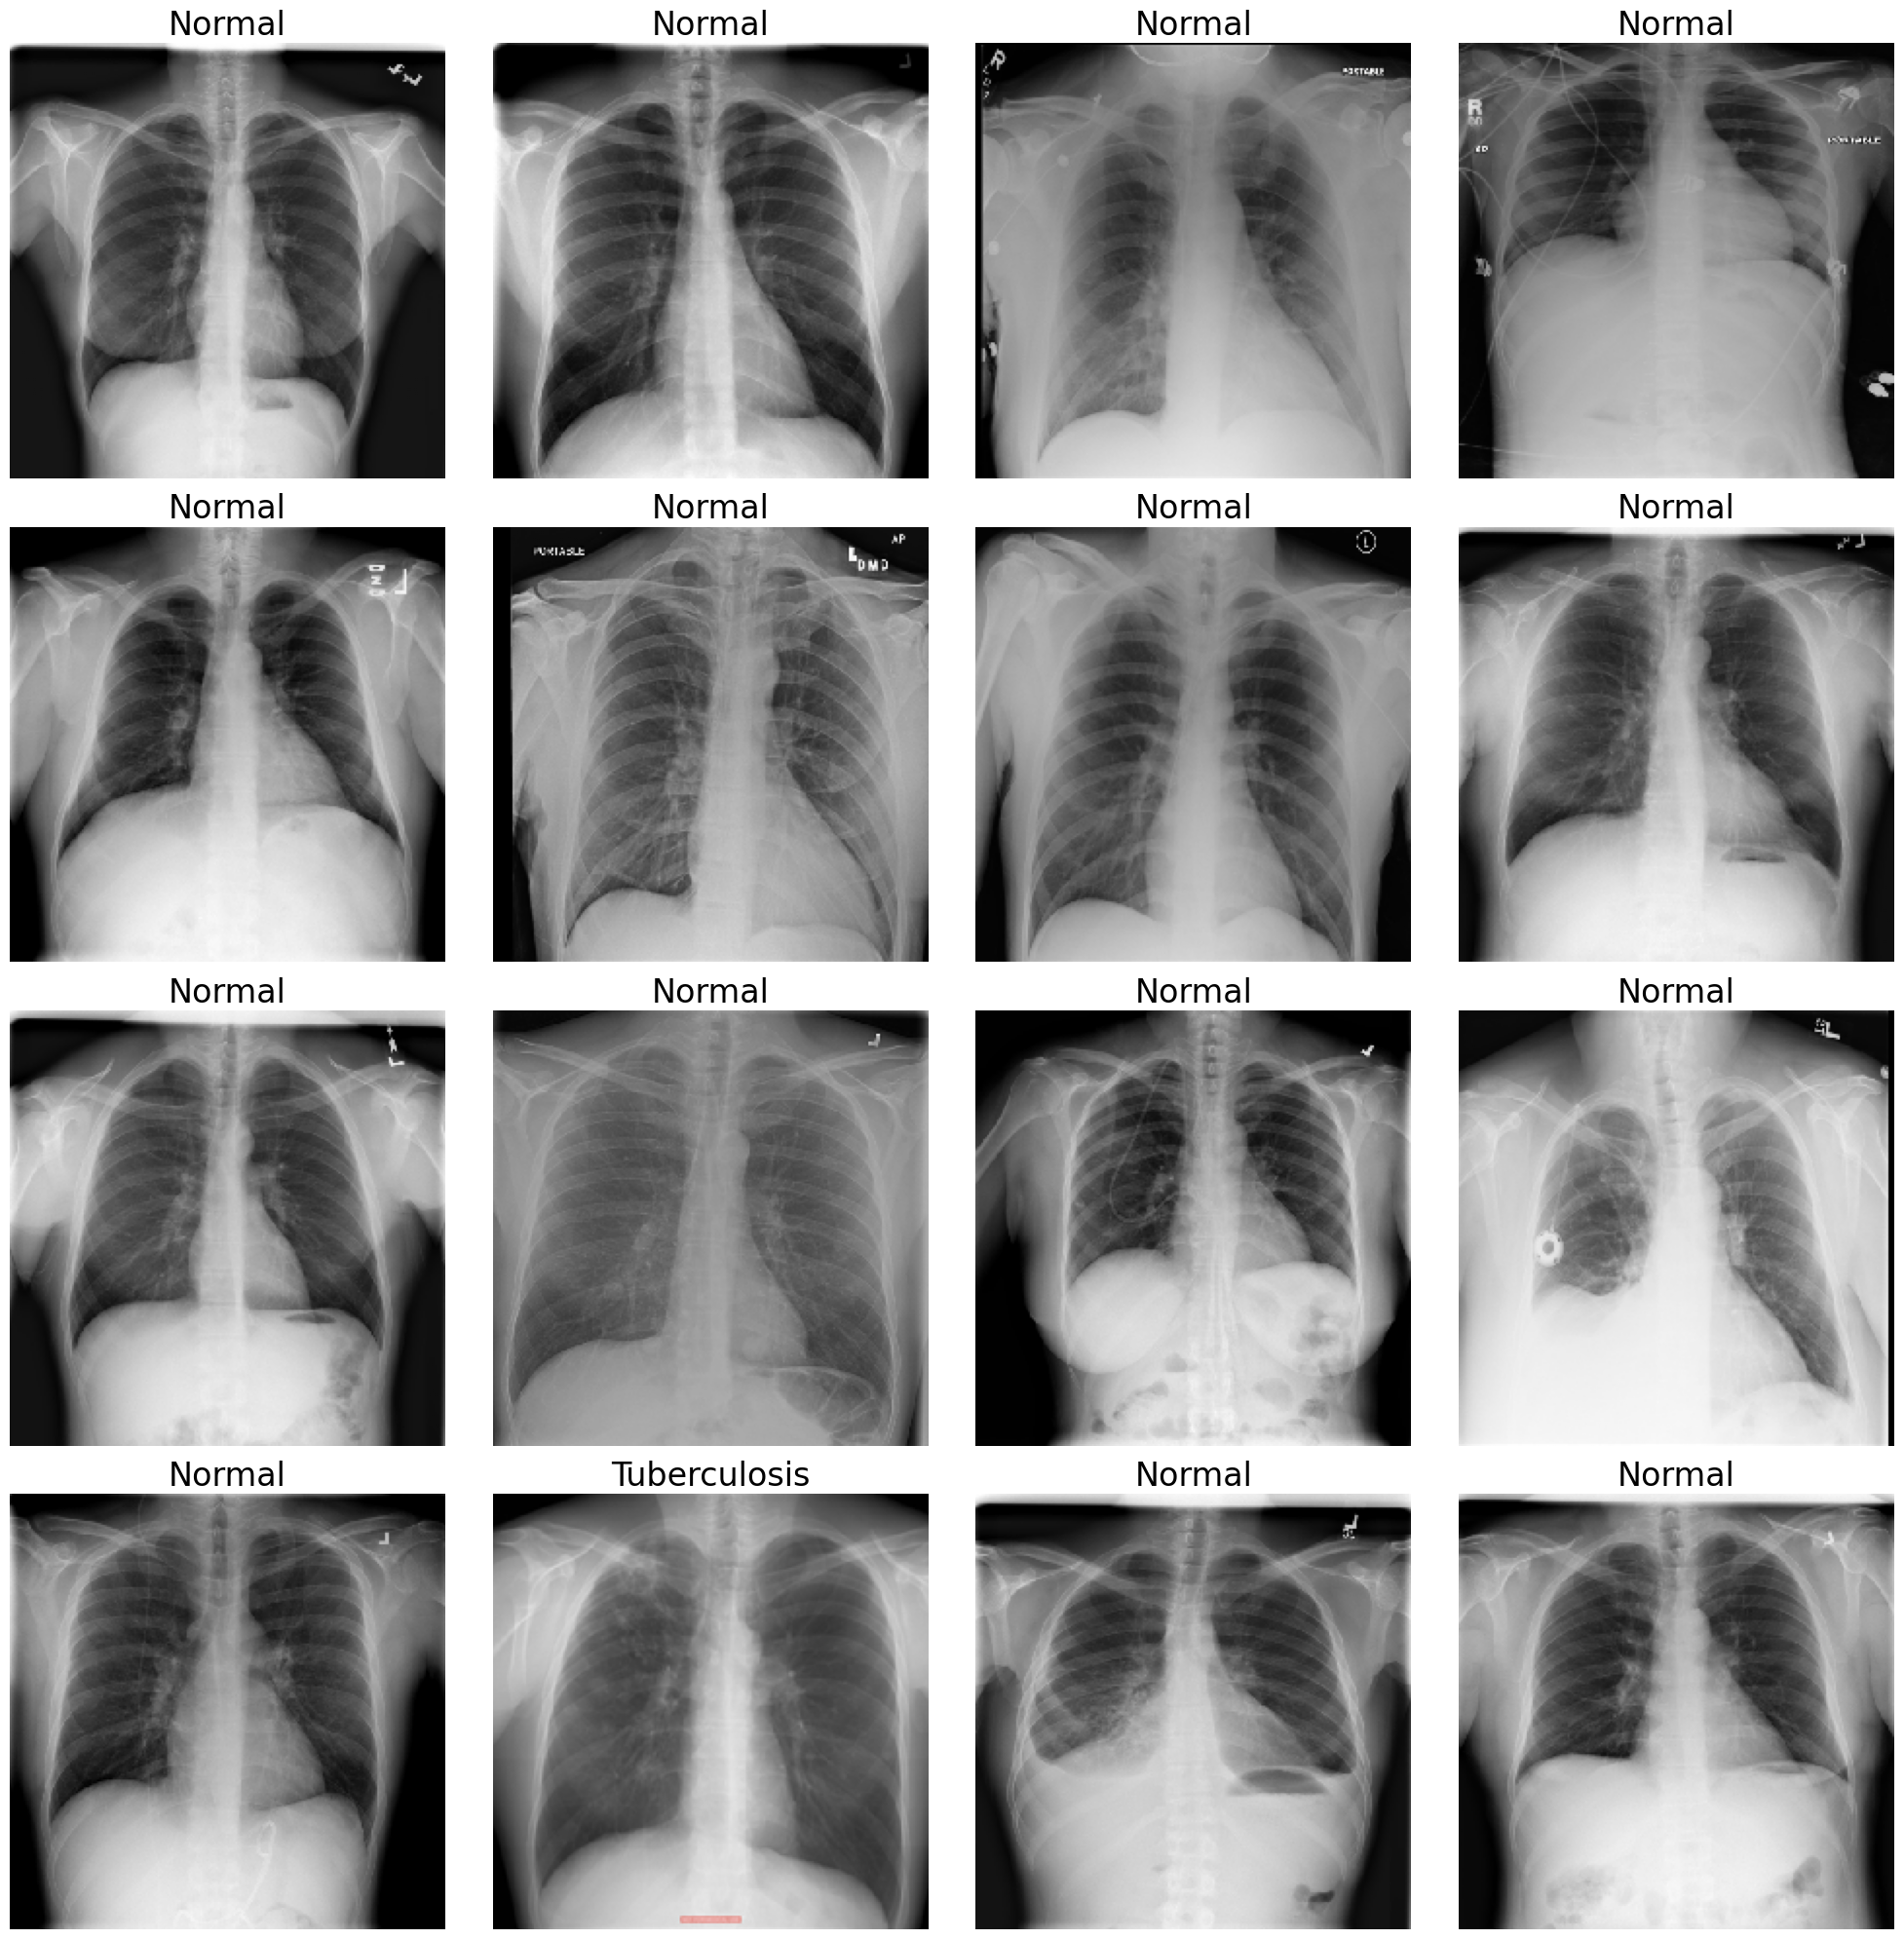

In [6]:
g_dict = train_gen.class_indices      
classes = list(g_dict.keys())       
images, labels = next(train_gen)      

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255      
    plt.imshow(image)
    index = np.argmax(labels[i]) 
    class_name = classes[index]   
    plt.title(class_name, color= 'black', fontsize= 24)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
from tensorflow.keras.layers import MaxPooling2D
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

class_count = len(list(train_gen.class_indices.keys())) 

model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(256,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(class_count, activation = "softmax")
])

model.compile(Adamax(0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [8]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))


base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')


model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 514       
                                                                 
Total params: 4383141 (16.72 MB)
Trainable params: 433

In [9]:
batch_size = 16   
epochs = 10  

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, 
                    validation_steps= None, shuffle= False)

Epoch 1/10
210/210 [==============================] - 1066s 5s/step - loss: 4.8638 - accuracy: 0.9571 - val_loss: 3.1917 - val_accuracy: 0.9405
Epoch 2/10
210/210 [==============================] - 754s 4s/step - loss: 2.2777 - accuracy: 0.9932 - val_loss: 1.6384 - val_accuracy: 0.9952
Epoch 3/10
210/210 [==============================] - 781s 4s/step - loss: 1.2585 - accuracy: 0.9946 - val_loss: 0.9134 - val_accuracy: 1.0000
Epoch 4/10
210/210 [==============================] - 715s 3s/step - loss: 0.7132 - accuracy: 0.9973 - val_loss: 0.5186 - val_accuracy: 1.0000
Epoch 5/10
210/210 [==============================] - 714s 3s/step - loss: 0.4174 - accuracy: 0.9982 - val_loss: 0.3016 - val_accuracy: 1.0000
Epoch 6/10
210/210 [==============================] - 734s 3s/step - loss: 0.2546 - accuracy: 0.9982 - val_loss: 0.1881 - val_accuracy: 1.0000
Epoch 7/10
210/210 [==============================] - 710s 3s/step - loss: 0.1711 - accuracy: 0.9988 - val_loss: 0.1311 - val_accuracy: 1.000

In [10]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

6/6 [==============================] - 8s 1s/step - loss: 0.0795 - accuracy: 1.0000
Train Loss:  0.09283360093832016
Train Accuracy:  1.0
--------------------
Validation Loss:  0.08845484256744385
Validation Accuracy:  1.0
--------------------
Test Loss:  0.07950989902019501
Test Accuracy:  1.0


In [11]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1) 

In [12]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       350
Tuberculosis       1.00      1.00      1.00        70

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



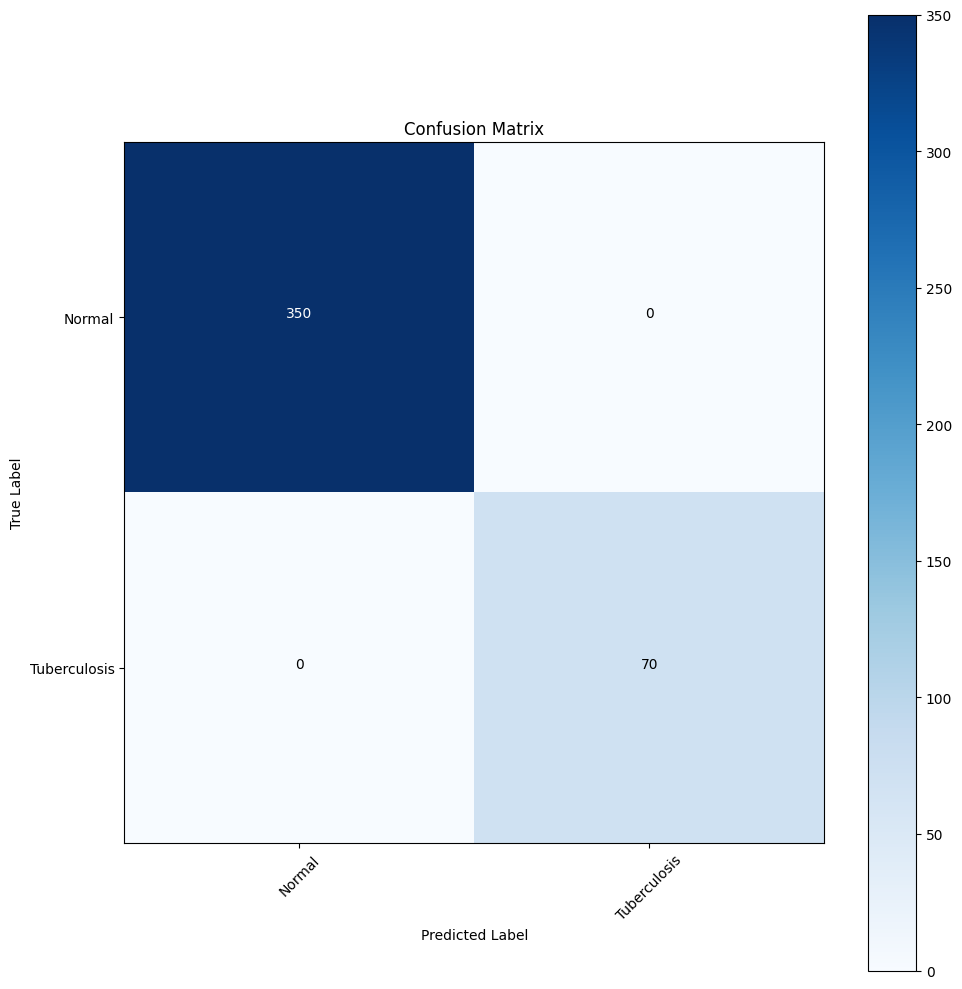

In [13]:
import itertools
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

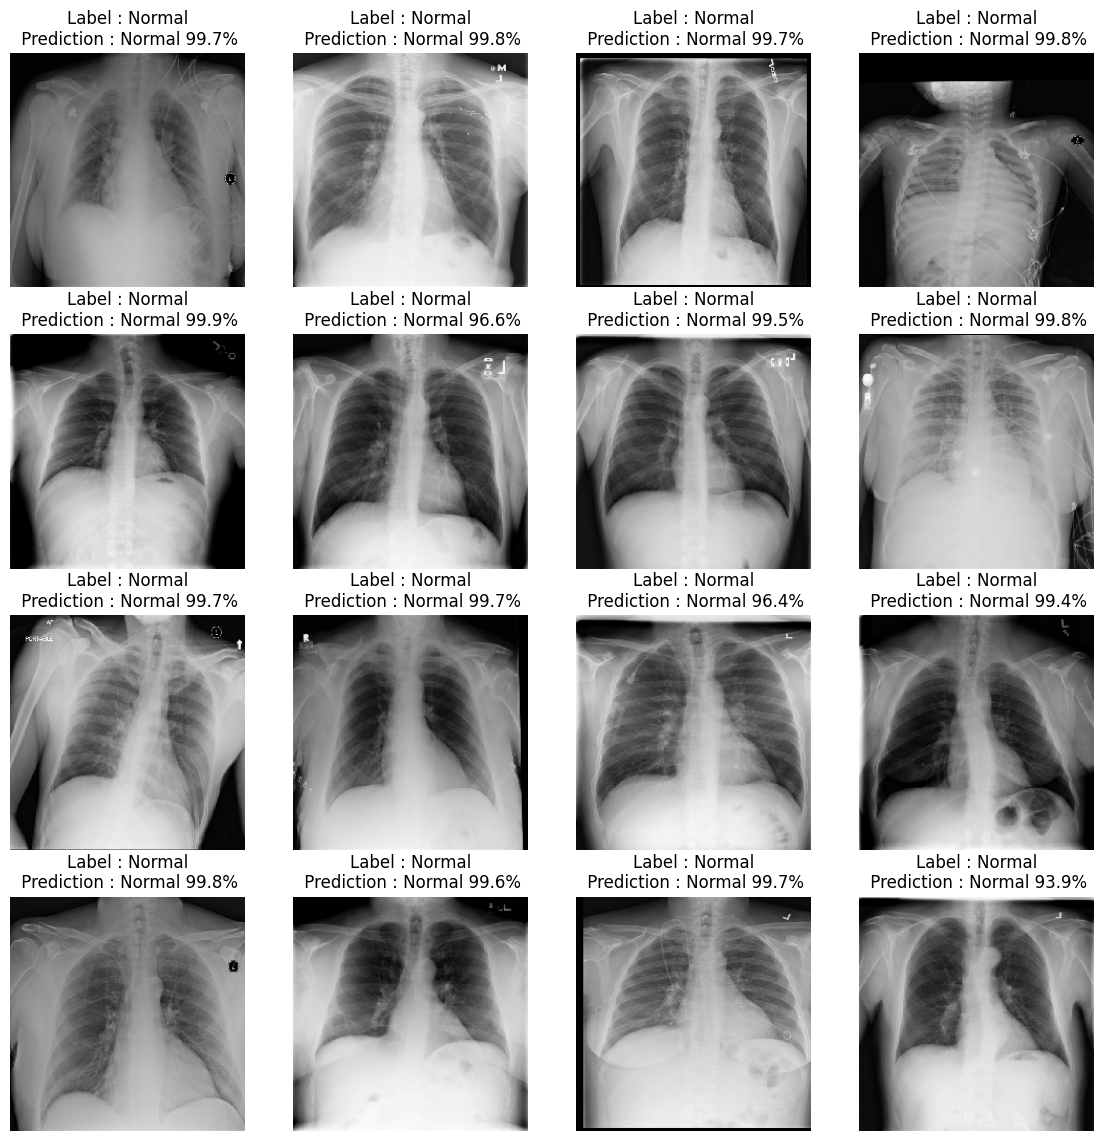

In [19]:
class_names = list(train_gen.class_indices.keys())

test_gen.reset()
img, label = next(test_gen)

preds = model.predict_generator(img)
y_pred = np.argmax(preds, axis=1) 

plt.figure(figsize=[14, 14])
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(img[i] / 255)  # Normalize image data
    plt.axis('off')
    plt.title("Label : {}\n Prediction : {} {:.1f}%".format(class_names[np.argmax(label[i])], class_names[y_pred[i]], 100 * np.max(preds[i])))
plt.show()
